In [73]:
from urllib.request import urlopen
import json
import happybase
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import plotly.graph_objs as go

In [89]:
connection = happybase.Connection(host='localhost', port=9090, autoconnect=True)
table = connection.table('USCovid19Cases')
# rows = table.rows(['Alabama31320201073','Alabama31320201101','Alabama31420201051'])

In [90]:
cases = pd.DataFrame(columns=['Cases', 'Deaths', 'County', 'Date', 'Fips', 'State'])
for key, value in table.scan(row_prefix=b''):
    nbrCases = int.from_bytes(value[b'NbrStatic:nbrCases'], byteorder='big') 
    nbrDeaths = int.from_bytes(value[b'NbrStatic:nbrDeaths'], byteorder='big')
    county = value[b'StateInfo:county'].decode('utf-8')
    nbrTracked = value[b'StateInfo:dtTracked'].decode('utf-8')
    fipCode = int.from_bytes(value[b'StateInfo:fipCode'], byteorder='big')
    state = value[b'StateInfo:state'].decode('utf-8')
    cases = cases.append({'Cases':nbrCases,'Deaths':nbrDeaths,'County':county,'Date':nbrTracked,'Fips':fipCode, 'State':state},ignore_index=True)

In [112]:
state_cases = cases[['State', 'Cases', 'Date','Deaths']].groupby(['State','Date'])['Cases', 'Deaths'].max().reset_index();

state_cases["Date"] = "US"

fig = px.treemap(state_cases, path=['Date','State'], values='Cases',
                  color='Deaths', hover_data=['State'],
                  color_continuous_scale='matter')
fig.show()

<ipython-input-112-c25f1fa0ec90>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



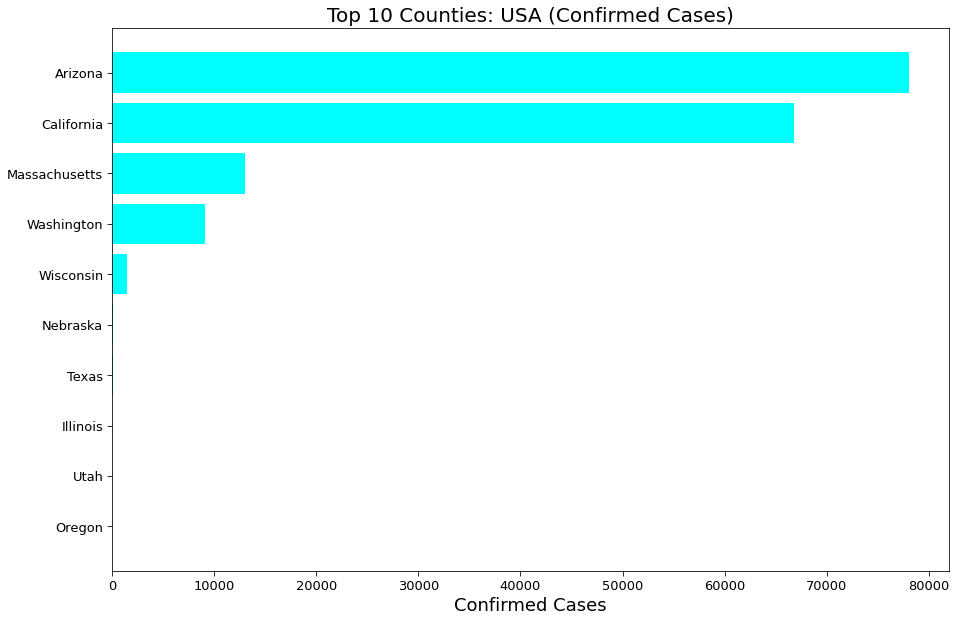

In [78]:
f = plt.figure(figsize=(15,10))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(cases.groupby(["State"]).sum().sort_values('Cases')["Cases"].index[-10:],cases.groupby(["State"]).sum().sort_values('Cases')["Cases"].values[-10:],color="cyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Counties: USA (Confirmed Cases)",fontsize=20)
plt.grid(False)
plt.savefig('Top 10 Counties_USA (Confirmed Cases).png')

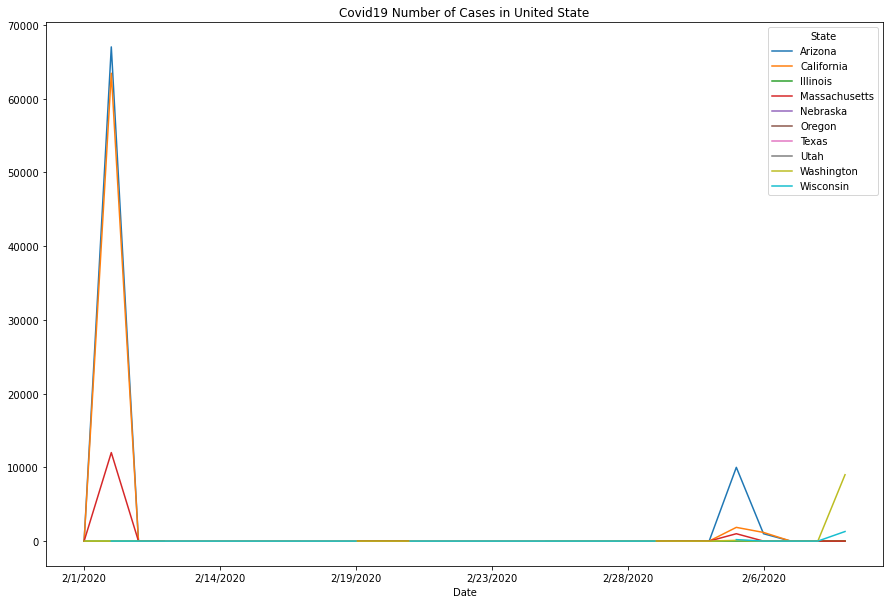

In [76]:
state_cases = cases[['State', 'Cases', 'Date']].groupby(['Date', 'State']).sum()['Cases'].unstack()
state_cases.plot(figsize=(15,10),title="Covid19 Number of Cases in United State")

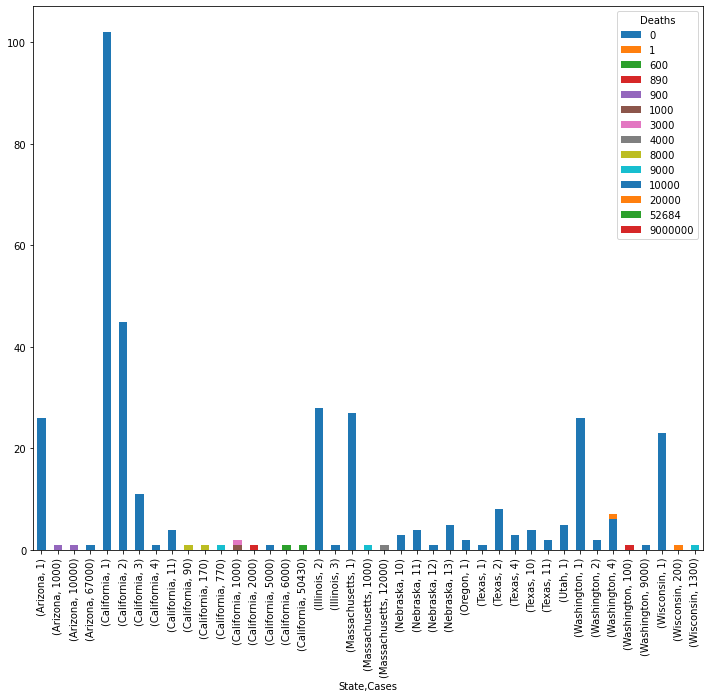

In [94]:

cases.groupby(['State', 'Cases','Deaths'])['State'].count().unstack('Deaths').plot.bar(stacked=True, figsize=(12,10));